In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import time
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/User/Downloads/New York.csv')
df


,passenger_count,trip_distance in km,tip_amount,Average speed in km/h,Pull_tourist,Dropp_tourist,Weekend,events_count,feelslike,opad,...,passenger_count*pull_tourist,average_speed*dropp_tourist,average_speed*pull_tourist,average_speed*dropp_tourist*pull_tourist,average_speed*rush_hours_1,average_speed*rush_hours_2,average_speed*rush_hours_3,dropp_tourist*pull_tourist,wind*opad,feelslike*opad
0,1.0,19.9,0.00,44.7,0,0,1,1473,3.1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,3.0,7.9,2.00,23.0,0,0,1,1612,-7.8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0,0.0,-0.0
2,1.0,2.9,1.95,20.2,0,0,1,1612,-7.4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.2,0,0.0,-0.0
3,2.0,30.2,0.00,34.3,0,0,1,1409,4.1,0,...,0.0,0.0,0.0,0.0,0.0,34.3,0.0,0,0.0,0.0
4,1.0,3.1,0.00,8.8,0,0,0,1148,11.2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.3,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446540,1.0,26.2,13.27,36.2,1,1,0,12950,16.1,0,...,1.0,36.2,36.2,36.2,0.0,36.2,0.0,1,0.0,0.0
446541,2.0,32.9,16.28,51.5,1,0,0,8774,21.1,0,...,2.0,0.0,51.5,0.0,0.0,51.5,0.0,0,0.0,0.0
446542,1.0,5.0,4.46,10.2,0,0,0,5155,19.6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
446543,1.0,11.2,5.36,36.9,0,0,0,10327,17.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [3]:
# 1 model (las losowy regresyjny)

y = df['tip_amount']
X = df.drop('tip_amount', axis = 1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train , test_size = 0.375, random_state = 8)

In [40]:

train = pd.concat([y_train, X_train], axis = 1)
#train['tip_amount_categorical'] = np.where(train['tip_amount'] == 0.0, 0, 1)
val = pd.concat([y_val, X_val], axis = 1)
test = pd.concat([y_test, X_test], axis = 1)

#train.to_csv('C:/Users/User/Documents/train_dataset.csv', index = False)
#val.to_csv('C:/Users/User/Documents/validation_dataset.csv', index = False)
#test.to_csv('C:/Users/User/Documents/test_dataset.csv', index = False)

In [6]:
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

223272
133964
89309


Błąd lasu losowego na pozytywnych = 0.8841740076208946
Udział 0 równa się 0.11843151306139359
Udział 1 równa się 0.8815684869386065


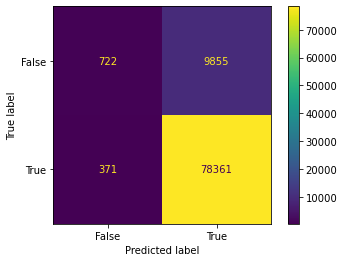

accuracy = 0.8854986619489638
recall = 0.9952878118173043
precision = 0.8882855717783622
FPR = 0.9317386782641581
SPC = 0.06826132173584191
Błąd hybrydy na 1 = 0.8868512316638604


In [136]:
### model lasu losowego - błąd na 1

df['tip_amount_classification'] = pd.DataFrame(np.where(df['tip_amount'] == 0.0, 0, 1))
y = df[['tip_amount_classification', 'tip_amount']]
X = df.drop(['tip_amount', 'tip_amount_classification'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train , test_size = 0.375, random_state = 8)


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0, max_depth = 8)
regressor.fit(X_train, y_train['tip_amount'])
y_test_regression = y_test[y_test['tip_amount_classification'] == 1]
X_test_regression = X_test.loc[y_test_regression.index.values, :]
predictions = regressor.predict(X_test_regression)
errors_train = abs(predictions - y_test_regression['tip_amount'])
print('Błąd lasu losowego na pozytywnych = ' + str(np.mean(errors_train)))

### model hybrydowy - klasyfikacja
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train['tip_amount_classification'])
predictions = model.predict(X_test)

print('Udział 0 równa się ' + str(y_test[y_test['tip_amount_classification'] == 0].shape[0] / y_test.shape[0]))
print('Udział 1 równa się ' + str(y_test[y_test['tip_amount_classification'] == 1].shape[0] / y_test.shape[0]))

from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test['tip_amount_classification'], predictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('accuracy = ' + str((TP+TN)/(FP+FN+TP+TN)))
print('recall = ' + str(TP/(TP+FN))) # true positive / positives
print('precision = ' + str(TP/(TP+FP))) # true positive / predicted positive
print('FPR = ' + str(FP/(FP+TN))) # false positives / negatives
print('SPC = ' + str(TN/(FP+TN))) # true nagetive / negatives
      
### model hybrydowy - predykcja na 1

predictions = model.predict(X_train)
y_train_vs_predictions = pd.concat([y_train,pd.DataFrame(predictions, index = y_train.index.values)], axis = 1)
y_train_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

y_train_regression = y_train_vs_predictions[y_train_vs_predictions['tip_amount_classification_prediction'] == 1]
X_train_regression = X_train.loc[y_train_regression.index.values,:]

regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, max_depth = 10 )
regressor.fit(X_train_regression, y_train_regression['tip_amount'])

predictions = model.predict(X_test)
y_test_vs_predictions = pd.concat([y_test,pd.DataFrame(predictions, index = y_test.index.values)], axis = 1)
y_test_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

y_test_regression = y_test_vs_predictions[y_test_vs_predictions['tip_amount_classification_prediction'] == 1]
X_test_regression = X_test.loc[y_test_regression.index.values,:]

predictions_regression = regressor.predict(X_test_regression)

y_test_vs_predictions_regression = pd.concat([y_test_regression,pd.DataFrame(predictions_regression, index = y_test_regression.index.values)], axis = 1)
y_test_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

y_test_vs_predictions_error = pd.concat([y_test_vs_predictions, y_test_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
y_test_vs_predictions_error = y_test_vs_predictions_error.reset_index()

lista = []
test = y_test_vs_predictions_error[y_test_vs_predictions_error['tip_amount_classification'] == 1]
test.reset_index(drop=True, inplace = True)


for i in range(test.shape[0]):
    if test['tip_amount_classification_prediction'][i] == 1:
        lista.append(test['tip_amount_regression_prediction'][i] - test['tip_amount'][i])
    else:
        lista.append(0.0 - test['tip_amount'][i])

print('Błąd hybrydy na 1 = ' + str(np.mean(abs(np.array(lista)))))




1.340190150239823


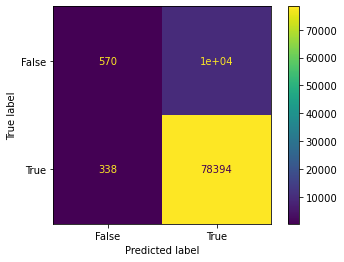

accuracy = 0.8841662094525747
recall = 0.995706955240563
precision = 0.8867999230777932
FPR = 0.9461094828401247
SPC = 0.0538905171598752


In [137]:
Heckman_df = pd.read_csv('C:/Users/User/Documents/NewYork_Heckman_test_classification_error.csv')
Heckman_df['testowanie_classification'] = pd.DataFrame(np.where(Heckman_df['testowanie_classification'] >0, 1, 0))
Heckman_df['tip_amount_classification'] = pd.DataFrame(np.where(Heckman_df['tip_amount'] == 0.0, 0, 1))
print(np.mean(abs(Heckman_df[Heckman_df['tip_amount_classification']==1]['testowanie'] - Heckman_df[Heckman_df['tip_amount_classification']==1]['tip_amount'])))
Heckman_df

confusion_matrix = metrics.confusion_matrix(Heckman_df['tip_amount_classification'], Heckman_df['testowanie_classification'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

TPR = TP/(TP+FN)
FPR = FP/(FP+TN)

print('accuracy = ' + str((TP+TN)/(FP+FN+TP+TN)))
print('recall = ' + str(TP/(TP+FN))) # true positive / positives, pol. czułość
print('precision = ' + str(TP/(TP+FP))) # true positive / predicted positive
print('FPR = ' + str(FP/(FP+TN))) # false positives / negatives
print('SPC = ' + str(TN/(FP+TN))) # true nagetive / negatives

In [7]:
start = time.time()

overfitting_data_frame_absolute = pd.DataFrame(columns=['train', 'validation', 'test'])

    
x = 0
    
for estimators in (3, 5, 10, 15):
    for depth in (1,2, 3, 4 ,5 ,6 ,7, 8, 9, 10, 11):
    
        regressor = RandomForestRegressor(n_estimators = estimators, random_state = 0, max_depth = depth)
        regressor.fit(X_train, y_train)

        predictions = regressor.predict(X_test)
        errors_test_1 = abs(predictions - y_test)

        predictions = regressor.predict(X_train)
        errors_train_1 = abs(predictions - y_train)

        predictions = regressor.predict(X_val)
        errors_val_1 = abs(predictions - y_val)

        overfitting_data_frame_absolute.loc[x] = (np.mean(errors_train_1), np.mean(errors_val_1), np.mean(errors_test_1))
        
        print(x)
        x+=1

end = time.time()
print(end - start)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
293.3969187736511


In [8]:
# liczenie błędów dla wszystkich zbiorów

predictions = regressor.predict(X_test)
errors_test_1 = abs(predictions - y_test)

predictions = regressor.predict(X_train)
errors_train_1 = abs(predictions - y_train)

predictions = regressor.predict(X_val)
errors_val_1 = abs(predictions - y_val)


(np.mean(errors_train_1), np.mean(errors_val_1), np.mean(errors_test_1))

(0.9974679992960216, 1.044938682576434, 1.0545327967093054)

In [10]:
overfitting_data_frame_absolute
#overfitting_data_frame['train'] - overfitting_data_frame['test']

,train,validation,test
0,1.328528,1.327805,1.336088
1,1.222009,1.222736,1.227887
2,1.141855,1.142843,1.150603
3,1.112141,1.114121,1.122340
4,1.083207,1.085518,1.094130
5,1.066545,1.069221,1.079160
6,1.050967,1.056004,1.066035
7,1.041614,1.052576,1.063617
8,1.030059,1.050687,1.061795
9,1.017673,1.051109,1.063697


In [ ]:
regressor = RandomForestRegressor(n_estimators = 30, random_state = 0, max_depth = 9)
regressor.fit(X_train, y_train)

sorted_idx = regressor.feature_importances_.argsort()[::-1][:len(regressor.feature_importances_)]
d = {'Nazwa cech' : X.columns[sorted_idx], 'Wartość' : regressor.feature_importances_[sorted_idx]}
pd.DataFrame(data = d).to_excel('C:/Users/User/Documents/NowyJork_random forest_1_ważność cech_wykres.xlsx')

In [85]:
# 2 model (regresja logistyczna + las losowy regresyjny)

df['tip_amount_classification'] = pd.DataFrame(np.where(df['tip_amount'] == 0.0, 0, 1))

In [86]:
y = df[['tip_amount_classification', 'tip_amount']]
X = df.drop(['tip_amount', 'tip_amount_classification'], axis = 1)

In [87]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 7)
X_train, X_val, y_train, y_val = train_test_split (X_train, y_train , test_size = 0.375, random_state = 8)

In [88]:
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

223272
133964
89309


In [6]:
start = time.time()

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train['tip_amount_classification'])



end = time.time()
print(end - start)

3.189067840576172


In [103]:
from scipy.stats import norm

def logit_pvalue(model, x):
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis =1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t = coefs/se
    p = (1 - norm.cdf(abs(t))) * 2
    return p

print(logit_pvalue(model, X_train))

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.40066195e-01 1.20152273e-01 1.38181899e-02 0.00000000e+00
 0.00000000e+00 2.48469844e-01 0.00000000e+00 0.00000000e+00
 6.32607208e-02 0.00000000e+00 3.08207946e-01 2.72610400e-03
 6.62826903e-01 4.53501711e-01 4.78827933e-01 9.67542962e-01
 1.13160184e-02 5.20311922e-02 0.00000000e+00 0.00000000e+00
 3.65307784e-12 7.12322201e-10 1.20771380e-03 7.89931353e-01
 9.29232084e-01 1.33210294e-01 6.31474566e-01]


In [7]:
print(pd.DataFrame(model.predict(X_test)).value_counts())
predictions = model.predict(X_test)


1    88216
0     1093
dtype: int64


In [8]:
# tworzenie zbioru uczącaego dla lasu losowego (filtrowanie po obserwacjach, dla których napiwek wystąpił)

y_train_regression = y_train[y_train['tip_amount_classification'] == 1]
X_train_regression = X_train.loc[y_train_regression.index.values, :]

In [47]:
y_train_regression

,tip_amount_classification,tip_amount
210480,1,8.45
248005,1,3.15
365037,1,3.06
54899,1,2.96
246288,1,2.15
...,...,...
97157,1,2.34
93421,1,2.64
131884,1,3.32
384136,1,3.32


In [9]:
# tworzenie ramki danych zawierającej ciąg testujący i predykcje z zachowaniem indeksów

y_test_vs_predictions = pd.concat([y_test,pd.DataFrame(predictions, index = y_test.index.values)], axis = 1)

y_test_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)
y_test_vs_predictions

,tip_amount_classification,tip_amount,tip_amount_classification_prediction
377885,1,1.76,1
420354,1,3.45,1
295286,1,2.76,1
396082,1,3.83,1
402707,1,3.15,1
...,...,...,...
167212,1,4.51,1
137039,1,2.21,1
124058,1,2.00,1
172064,1,1.86,1


In [10]:
# utworzenie ciąg testującego dla rasu losowego na podstawie zasady: predykcje = 1

y_test_regression = y_test_vs_predictions[y_test_vs_predictions['tip_amount_classification_prediction'] == 1]
#y_test_regression['tip_amount_classification'].value_counts()
#y_test_regression[0].value_counts()

In [11]:
# utworzenie ciąg testującego dla rasu losowego na podstawie zasady: predykcje = 1

X_test_regression = X_test.loc[y_test_regression.index.values,:]
#pd.DataFrame(X_test_regression.index.values == y_test_regression.index.values).value_counts()

In [86]:
start = time.time()

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, )
regressor.fit(X_train_regression, y_train_regression['tip_amount'])

end = time.time()
print(end - start)

267.13019156455994


In [87]:
predictions_regression = regressor.predict(X_test_regression)


In [88]:
#print(predictions_regression.shape[0])
#sum_regression = sum(abs(y_test_regression['tip_amount'] - predictions_regression))
y_test_regression

,tip_amount_classification,tip_amount,tip_amount_classification_prediction
377885,1,1.76,1
420354,1,3.45,1
295286,1,2.76,1
396082,1,3.83,1
402707,1,3.15,1
...,...,...,...
167212,1,4.51,1
137039,1,2.21,1
124058,1,2.00,1
172064,1,1.86,1


In [89]:
y_test_regression.shape[0] == len(predictions_regression)



True

In [90]:
y_test_vs_predictions_regression = pd.concat([y_test_regression,pd.DataFrame(predictions_regression, index = y_test_regression.index.values)], axis = 1)
y_test_vs_predictions_regression

y_test_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

In [97]:
y_test_vs_predictions_error = pd.concat([y_test_vs_predictions, y_test_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
y_test_vs_predictions_error = y_test_vs_predictions_error.reset_index()

In [103]:

lista = []

for i in range(y_test_vs_predictions_error.shape[0]):
    if y_test_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
        lista.append(y_test_vs_predictions_error['tip_amount_regression_prediction'][i] - y_test_vs_predictions_error['tip_amount'][i])
    else:
        lista.append(0.0 - y_test_vs_predictions_error['tip_amount'][i])
        

In [109]:
errors_test_2 = abs(np.array(lista))

In [12]:
### liczenie błędu dla zbioru trenującego

start = time.time()


overfitting_data_frame_absolute_2 = pd.DataFrame(columns=['train', 'validation', 'test', 'estimators', 'depth'])


x = 0

   
for estimators in (20, 30, 40, 50):
    for depth in (9, 10, 11):

        model = LogisticRegression(solver='liblinear', random_state=0)
        model.fit(X_train, y_train['tip_amount_classification'])



# train
        predictions = model.predict(X_train)
        y_train_vs_predictions = pd.concat([y_train,pd.DataFrame(predictions, index = y_train.index.values)], axis = 1)
        y_train_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

        y_train_regression = y_train_vs_predictions[y_train_vs_predictions['tip_amount_classification_prediction'] == 1]
        X_train_regression = X_train.loc[y_train_regression.index.values,:]

        regressor = RandomForestRegressor(n_estimators = estimators, random_state = 0, max_depth = depth )
        regressor.fit(X_train_regression, y_train_regression['tip_amount'])

        predictions_regression = regressor.predict(X_train_regression)

        y_train_vs_predictions_regression = pd.concat([y_train_regression,pd.DataFrame(predictions_regression, index = y_train_regression.index.values)], axis = 1)
        y_train_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

        y_train_vs_predictions_error = pd.concat([y_train_vs_predictions, y_train_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
        y_train_vs_predictions_error = y_train_vs_predictions_error.reset_index()

        lista = []

        for i in range(y_train_vs_predictions_error.shape[0]):
            if y_train_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
                lista.append(y_train_vs_predictions_error['tip_amount_regression_prediction'][i] - y_train_vs_predictions_error['tip_amount'][i])
            else:
                lista.append(0.0 - y_train_vs_predictions_error['tip_amount'][i])

        errors_train_2 = abs(np.array(lista))
# valid
        predictions = model.predict(X_val)
        y_val_vs_predictions = pd.concat([y_val,pd.DataFrame(predictions, index = y_val.index.values)], axis = 1)
        y_val_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

        y_val_regression = y_val_vs_predictions[y_val_vs_predictions['tip_amount_classification_prediction'] == 1]
        X_val_regression = X_val.loc[y_val_regression.index.values,:]

        predictions_regression = regressor.predict(X_val_regression)

        y_val_vs_predictions_regression = pd.concat([y_val_regression,pd.DataFrame(predictions_regression, index = y_val_regression.index.values)], axis = 1)
        y_val_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

        y_val_vs_predictions_error = pd.concat([y_val_vs_predictions, y_val_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
        y_val_vs_predictions_error = y_val_vs_predictions_error.reset_index()

        lista = []

        for i in range(y_val_vs_predictions_error.shape[0]):
            if y_val_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
                lista.append(y_val_vs_predictions_error['tip_amount_regression_prediction'][i] - y_val_vs_predictions_error['tip_amount'][i])
            else:
                lista.append(0.0 - y_val_vs_predictions_error['tip_amount'][i])

        errors_val_2 = abs(np.array(lista))

# test

        predictions = model.predict(X_test)
        y_test_vs_predictions = pd.concat([y_test,pd.DataFrame(predictions, index = y_test.index.values)], axis = 1)
        y_test_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

        y_test_regression = y_test_vs_predictions[y_test_vs_predictions['tip_amount_classification_prediction'] == 1]
        X_test_regression = X_test.loc[y_test_regression.index.values,:]

        predictions_regression = regressor.predict(X_test_regression)

        y_test_vs_predictions_regression = pd.concat([y_test_regression,pd.DataFrame(predictions_regression, index = y_test_regression.index.values)], axis = 1)
        y_test_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

        y_test_vs_predictions_error = pd.concat([y_test_vs_predictions, y_test_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
        y_test_vs_predictions_error = y_test_vs_predictions_error.reset_index()

        lista = []

        for i in range(y_test_vs_predictions_error.shape[0]):
            if y_test_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
                lista.append(y_test_vs_predictions_error['tip_amount_regression_prediction'][i] - y_test_vs_predictions_error['tip_amount'][i])
            else:
                lista.append(0.0 - y_test_vs_predictions_error['tip_amount'][i])

        errors_test_2 = abs(np.array(lista))

        overfitting_data_frame_absolute_2.loc[x] = (np.mean(errors_train_2), np.mean(errors_val_2), np.mean(errors_test_2), estimators, depth)

        print(x)
        x+=1



end = time.time()
print(end - start)

0
1
2
3
4
5
6
7
8
9
10
11
719.4565360546112


In [13]:
overfitting_data_frame_absolute_2

,train,validation,test,estimators,depth
0,1.020778,1.040522,1.051548,20.0,9.0
1,1.007665,1.039418,1.049890,20.0,10.0
2,0.992565,1.039383,1.049922,20.0,11.0
3,1.020417,1.039978,1.050823,30.0,9.0
4,1.007297,1.038480,1.049073,30.0,10.0
5,0.991810,1.038312,1.048778,30.0,11.0
6,1.020153,1.039934,1.050454,40.0,9.0
7,1.006981,1.038232,1.048534,40.0,10.0
8,0.991391,1.037908,1.048172,40.0,11.0
9,1.020051,1.039750,1.050157,50.0,9.0


In [98]:
overfitting_data_frame_absolute_2.to_excel('C:/Users/User/Documents/overfitting_NewYork.xlsx')

In [51]:
df_heckman_train = pd.read_csv('C:/Users/User/Documents/NewYork_Heckman_train_error.csv')
df_heckman_val = pd.read_csv('C:/Users/User/Documents/NewYork_Heckman_validation_error.csv')
df_heckman_test = pd.read_csv('C:/Users/User/Documents/NewYork_Heckman_test_error.csv')

In [52]:
df_heckman_train['tip_amount'] = df_heckman_train['tip_amount'].fillna(0)
df_heckman_val['tip_amount'] = df_heckman_val['tip_amount'].fillna(0)
df_heckman_test['tip_amount'] = df_heckman_test['tip_amount'].fillna(0)

In [8]:
print(sum(abs(df_heckman_train['tip_amount'] - df_heckman_train['testowanie']))/df_heckman_train.shape[0])
print(sum(abs(df_heckman_val['tip_amount'] - df_heckman_val['testowanie']))/df_heckman_val.shape[0])
sum(abs(df_heckman_test['tip_amount'] - df_heckman_test['testowanie']))/df_heckman_test.shape[0]

1.4586425968866576
1.4538052469639633


1.4608473969237592

In [68]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0, max_depth = 8)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=10, random_state=0)

In [70]:
regressor.feature_importances_

array([1.64830429e-03, 6.18666012e-01, 3.26878763e-02, 4.21752398e-05,
       1.02888555e-04, 8.37531766e-05, 1.74248718e-02, 8.29986737e-03,
       3.03113558e-05, 5.98651425e-03, 7.39445171e-03, 7.60334808e-03,
       7.60919271e-02, 4.16507904e-04, 3.34360699e-04, 2.87586647e-04,
       5.40757558e-04, 3.17977154e-04, 2.97350142e-04, 1.00834499e-03,
       2.67307438e-04, 4.94548770e-02, 1.59082290e-01, 6.94500287e-04,
       1.75177547e-03, 3.25649833e-03, 3.65132825e-03, 5.21252076e-05,
       7.98949376e-04, 1.72516254e-03])

In [73]:

importance = regressor.feature_importances_
sorted_idx = importance.argsort()[::-1][:len(importance)]
d = {'Nazwa cech' : X.columns[sorted_idx], 'Wartość' : regressor.feature_importances_[sorted_idx]}
pd.DataFrame(data = d).to_excel('C:/Users/User/Documents/NowyJork_regresja logistyczna_ważność cech_wykres.xlsx')


sorted_idx = regressor.feature_importances_.argsort()[::-1][:len(regressor.feature_importances_)]
d = {'Nazwa cech' : X.columns[sorted_idx], 'Wartość' : regressor.feature_importances_[sorted_idx]}
pd.DataFrame(data = d).to_excel('C:/Users/User/Documents/NowyJork_random forest_2_ważność cech_wykres.xlsx')

In [88]:
from sklearn.linear_model import LogisticRegression
for ratio in ({0: 600, 1: 100}, {0:500, 1:50}, {0:400, 1:150}):
    model = LogisticRegression(solver='liblinear', random_state=0, class_weight = ratio)
    model.fit(X_train, y_train['tip_amount_classification'])
    

[[ 4.45798680e-02 -5.67999477e-02  1.11735069e-02  2.52475655e-01
   3.15006752e-01  3.58570285e-02  4.01900788e-06 -2.62054117e-04
  -1.48010679e-02 -1.00740622e-03  7.54029787e-01  9.57070729e-02
  -5.54956258e-01 -2.47339899e-01  2.12620481e-03  6.88548613e-02
   3.45111095e-02  1.26030600e-02 -1.56338851e-01  7.38347853e-02
   5.12367244e-02  1.70062287e-02  3.09597475e-02 -2.56207823e-02
   4.62624971e-04  1.00418874e-02 -3.61482424e-03 -5.09549625e-02
   3.12113367e-03  1.29747706e-04]]
[[ 5.30266427e-02 -5.25901584e-02  8.90443337e-03  2.41950643e-01
   3.03305594e-01 -1.11156811e-03  3.38879263e-06 -8.06894687e-04
  -4.73996789e-02 -7.91558347e-04  7.05439811e-01  4.83860697e-02
  -6.77685856e-01 -2.61241357e-01 -5.28005835e-02  3.29160752e-02
   1.46921233e-02  3.72695461e-03 -1.55655759e-01  9.01284547e-02
   5.94282366e-02  1.52648651e-02  2.91323509e-02 -2.46930475e-02
   1.24574253e-03  1.25042105e-02 -2.11023493e-03 -6.41615866e-02
   4.32984593e-03  1.24901135e-03]]
[[ 7

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
regressor = RandomForestRegressor(n_estimators = 30, random_state = 0, max_depth = 9)
regressor.fit(X_train, y_train)
sum(abs(regressor.predict(X_test) - y_test))/y_test.shape[0]

1.0545510320393647

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.coef_

array([ 4.77945349e-02,  1.24717162e-01, -1.71819742e-02, -7.64852105e-01,
       -4.69359749e-01, -2.21187486e-02,  4.55616057e-06,  3.63603879e-03,
        5.22666026e-02,  1.91431008e-03, -1.00827565e+00,  2.37673272e-01,
       -1.71325584e+00, -1.29727133e-01,  6.17685627e-02, -7.67435728e-02,
       -1.42487686e-02, -1.56700010e-02, -1.10817521e-02,  3.88883009e-03,
        6.36477897e-03,  5.76049883e-02,  7.53265165e-02, -3.42368365e-02,
       -2.99501090e-03,  3.63423724e-03,  7.30848252e-03,  2.50234320e-01,
       -1.69544308e-03, -8.26547227e-04])

In [15]:
#X = X['Average speed in km/h']
reg2 = LinearRegression().fit(np.array(X).reshape(-1,1), y)
reg2.coef_

array([0.07519766])

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [21]:
full = pd.DataFrame()
dropp = pd.DataFrame()

full['features'] = X.columns
full['coefficients'] = LinearRegression().fit(X,y).coef_

X = X.drop('Average speed in km/h', axis = 1)
dropp['features'] = X.columns
dropp['coefficients'] = LinearRegression().fit(X,y).coef_

In [25]:
print(df['Average speed in km/h'].corr(df['Rush_hours_1']))
print(df['Average speed in km/h'].corr(df['Rush_hours_2']))
print(df['Average speed in km/h'].corr(df['Rush_hours_3']))

0.0020134018918280265
-0.094073724187009
0.11975435515889722


In [29]:
vif_data

,feature,VIF
0,passenger_count,4.528033
1,trip_distance in km,3.584808
2,Average speed in km/h,12.965704
3,Pull_tourist,8.763658
4,Dropp_tourist,9.414963
5,Weekend,3.928772
6,events_count,3.031981
7,feelslike,3.342290
8,opad,7.355139
9,wind,4.416368


In [32]:
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     6445.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        14:23:41   Log-Likelihood:            -9.3202e+05
No. Observations:              446545   AIC:                         1.864e+06
Df Residuals:                  446514   BIC:                         1.864e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [34]:
X2 = sm.add_constant(X.drop('Average speed in km/h', axis = 1))
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     6616.
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        14:24:55   Log-Likelihood:            -9.3254e+05
No. Observations:              446545   AIC:                         1.865e+06
Df Residuals:                  446515   BIC:                         1.865e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [38]:
import statsmodels.api as smf
y = np.where(df['tip_amount'] == 0.0, 0, 1)
probit_model=smf.Probit(y,X)
result=probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.324258
         Iterations 7
                                      Results: Probit
Model:                       Probit                   Pseudo R-squared:         0.105      
Dependent Variable:          y                        AIC:                      289651.7881
Date:                        2023-05-10 16:10         BIC:                      289982.0670
No. Observations:            446545                   Log-Likelihood:           -1.4480e+05
Df Model:                    29                       LL-Null:                  -1.6177e+05
Df Residuals:                446515                   LLR p-value:              0.0000     
Converged:                   1.0000                   Scale:                    1.0000     
No. Iterations:              7.0000                                                        
-------------------------------------------------------------------------------------------
                

In [39]:
import statsmodels.api as smf
y = np.where(df['tip_amount'] == 0.0, 0, 1)
probit_model=smf.Probit(y,X.drop('Average speed in km/h', axis = 1))
result=probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.327929
         Iterations 7
                                      Results: Probit
Model:                       Probit                   Pseudo R-squared:         0.095      
Dependent Variable:          y                        AIC:                      292927.9631
Date:                        2023-05-10 16:12         BIC:                      293247.2326
No. Observations:            446545                   Log-Likelihood:           -1.4643e+05
Df Model:                    28                       LL-Null:                  -1.6177e+05
Df Residuals:                446516                   LLR p-value:              0.0000     
Converged:                   1.0000                   Scale:                    1.0000     
No. Iterations:              7.0000                                                        
-------------------------------------------------------------------------------------------
                

In [51]:
df[df['Pull_tourist'] == 1]['tip_amount'].corr(df[df['Pull_tourist'] == 1]['Average speed in km/h'])

0.5486907324031577

In [78]:
y_train
y_train_balans = y_train.groupby('tip_amount_classification').apply(lambda x: x.sample(y_train.shape[0], replace = True))

In [138]:

### liczenie błędu dla zbioru trenującego

start = time.time()


#overfitting_data_frame_absolute_2 = pd.DataFrame(columns=['train', 'validation', 'test', 'weight'])


x = 11

   
for i in [{0:15, 1:1}, {0:20, 1:1}, {0:30, 1:1}, {0:50, 1:1}, {0:75, 1:1}, {0:100, 1:1}, {0:200, 1:1}, {0:300, 1:1}, {0:600, 1:1}, 
         {0:1000, 1:1}, {0:2000, 1:1}]:
    

    model = LogisticRegression(solver='liblinear', random_state=0, class_weight = i)
    model.fit(X_train, y_train['tip_amount_classification'])



# train
    predictions = model.predict(X_train)
    y_train_vs_predictions = pd.concat([y_train,pd.DataFrame(predictions, index = y_train.index.values)], axis = 1)
    y_train_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

    y_train_regression = y_train_vs_predictions[y_train_vs_predictions['tip_amount_classification_prediction'] == 1]
    X_train_regression = X_train.loc[y_train_regression.index.values,:]

    regressor = RandomForestRegressor(n_estimators = 50, random_state = 0, max_depth = 10 )
    regressor.fit(X_train_regression, y_train_regression['tip_amount'])

    predictions_regression = regressor.predict(X_train_regression)

    y_train_vs_predictions_regression = pd.concat([y_train_regression,pd.DataFrame(predictions_regression, index = y_train_regression.index.values)], axis = 1)
    y_train_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

    y_train_vs_predictions_error = pd.concat([y_train_vs_predictions, y_train_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
    y_train_vs_predictions_error = y_train_vs_predictions_error.reset_index()

    lista = []

    for i in range(y_train_vs_predictions_error.shape[0]):
        if y_train_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
            lista.append(y_train_vs_predictions_error['tip_amount_regression_prediction'][i] - y_train_vs_predictions_error['tip_amount'][i])
        else:
            lista.append(0.0 - y_train_vs_predictions_error['tip_amount'][i])

    errors_train_2 = abs(np.array(lista))
# valid
    predictions = model.predict(X_val)
    y_val_vs_predictions = pd.concat([y_val,pd.DataFrame(predictions, index = y_val.index.values)], axis = 1)
    y_val_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

    y_val_regression = y_val_vs_predictions[y_val_vs_predictions['tip_amount_classification_prediction'] == 1]
    X_val_regression = X_val.loc[y_val_regression.index.values,:]

    predictions_regression = regressor.predict(X_val_regression)

    y_val_vs_predictions_regression = pd.concat([y_val_regression,pd.DataFrame(predictions_regression, index = y_val_regression.index.values)], axis = 1)
    y_val_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

    y_val_vs_predictions_error = pd.concat([y_val_vs_predictions, y_val_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
    y_val_vs_predictions_error = y_val_vs_predictions_error.reset_index()

    lista = []

    for i in range(y_val_vs_predictions_error.shape[0]):
        if y_val_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
            lista.append(y_val_vs_predictions_error['tip_amount_regression_prediction'][i] - y_val_vs_predictions_error['tip_amount'][i])
        else:
            lista.append(0.0 - y_val_vs_predictions_error['tip_amount'][i])

    errors_val_2 = abs(np.array(lista))

# test

    predictions = model.predict(X_test)
    y_test_vs_predictions = pd.concat([y_test,pd.DataFrame(predictions, index = y_test.index.values)], axis = 1)
    y_test_vs_predictions.rename(columns = {0 : 'tip_amount_classification_prediction'}, inplace = True)

    y_test_regression = y_test_vs_predictions[y_test_vs_predictions['tip_amount_classification_prediction'] == 1]
    X_test_regression = X_test.loc[y_test_regression.index.values,:]

    predictions_regression = regressor.predict(X_test_regression)

    y_test_vs_predictions_regression = pd.concat([y_test_regression,pd.DataFrame(predictions_regression, index = y_test_regression.index.values)], axis = 1)
    y_test_vs_predictions_regression.rename(columns = {0 : 'tip_amount_regression_prediction'}, inplace = True)

    y_test_vs_predictions_error = pd.concat([y_test_vs_predictions, y_test_vs_predictions_regression['tip_amount_regression_prediction']], axis = 1 )
    y_test_vs_predictions_error = y_test_vs_predictions_error.reset_index()

    lista = []

    for i in range(y_test_vs_predictions_error.shape[0]):
        if y_test_vs_predictions_error['tip_amount_classification_prediction'][i] == 1:
            lista.append(y_test_vs_predictions_error['tip_amount_regression_prediction'][i] - y_test_vs_predictions_error['tip_amount'][i])
        else:
            lista.append(0.0 - y_test_vs_predictions_error['tip_amount'][i])

    errors_test_2 = abs(np.array(lista))

    overfitting_data_frame_absolute_2.loc[x] = (np.mean(errors_train_2), np.mean(errors_val_2), np.mean(errors_test_2), i)

    print(x)
    x+=1



end = time.time()
print(end - start)

11
12
13
14
15
16
17
18


ValueError: Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required by RandomForestRegressor.